<a href="https://colab.research.google.com/github/VithGab/-Data_Sciences_VG/blob/main/Dataset_Boardgame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
import kagglehub

path = kagglehub.dataset_download("chik0di/board-games-dataset-complete-features")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'board-games-dataset-complete-features' dataset.
Path to dataset files: /kaggle/input/board-games-dataset-complete-features


In [3]:
csv_path = path + "/boardgame-geek-dataset_organized.csv"

df = pd.read_csv(csv_path)

display(df.head())

,row_id,boardgame,release_year,min_players,max_players,min_playtime,max_playtime,minimum_age,avg_rating,num_ratings,...,rank_strategy,rank_thematic,rank_family,rank_war,rank_customizable,rank_abstract,rank_party,rank_childrens,url,description
0,1,Brass: Birmingham,2018,2,4,60,120,14,8.575,53548,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/224517/bra...,"Build networks, grow industries, and navigate ..."
1,2,Pandemic Legacy: Season 1,2015,2,4,60,60,13,8.512,56071,...,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/161936/pan...,Mutating diseases are spreading around the wor...
2,3,Ark Nova,2021,1,4,90,150,14,8.539,54528,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/342942/ark...,"Plan and build a modern, scientifically manage..."
3,4,Gloomhaven,2017,1,4,60,120,14,8.557,65443,...,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/174430/glo...,Vanquish monsters with strategic cardplay. Ful...
4,5,Twilight Imperium: Fourth Edition,2017,3,6,240,480,14,8.572,26686,...,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/233078/twi...,"Build an intergalactic empire through trade, r..."


In [4]:
print("\n" + "="*100)
print("Dataset general information:")
print(df.info())

print("\n" + "="*100)
print("Description :")
print(df['max_players'].describe())
print(df['avg_rating'].describe())

print("\n" + "="*100)
print('Game average: "Brass: Birmingham"')
print(df.loc[0, 'avg_rating'])

print("\n" + "="*100)

avg_playtime = df.loc[0, ['min_playtime', 'max_playtime']].mean() #loc[0,... corresponde a linha almejada// means whished line

print(f'Average game time  "Brass: Birmingham": {avg_playtime}')

print("\n" + "="*100)
if 'min_players' in df.columns:
    minimo = df['min_players'].dropna()
print(f"standard deviation: R$ {minimo.std():.2f}")

#Are there any null values?
total_nulos = df.isnull().sum().sum()
total_valores = df.size
percentual_total_nulos = (total_nulos / total_valores) * 100

print(f"\nTotal null: {total_nulos}")
print(f"Percentage null: {percentual_total_nulos:.2f}%")
print(f"Founded {total_nulos} null values, this values could change the results if they aren't processed.")


Dataset general information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_id             2000 non-null   int64  
 1   boardgame          2000 non-null   object 
 2   release_year       2000 non-null   int64  
 3   min_players        2000 non-null   int64  
 4   max_players        2000 non-null   int64  
 5   min_playtime       2000 non-null   int64  
 6   max_playtime       2000 non-null   int64  
 7   minimum_age        2000 non-null   int64  
 8   avg_rating         2000 non-null   float64
 9   num_ratings        2000 non-null   int64  
 10  complexity         2000 non-null   float64
 11  rank_overall       2000 non-null   int64  
 12  owned              2000 non-null   int64  
 13  wishlisted         2000 non-null   int64  
 14  total_plays        2000 non-null   int64  
 15  fans               2000 non-null   int64  

Nulls quantity: 0



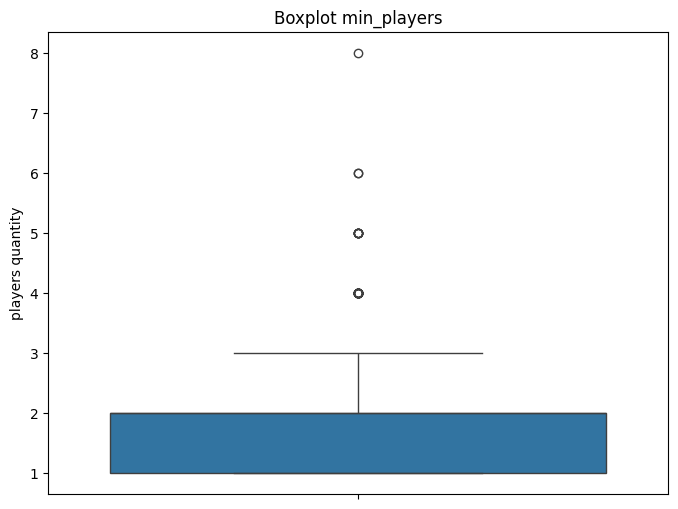

In [5]:
print('Nulls quantity:',(df['avg_rating'].isnull().sum()))
#Didn't found any null value, but if were, should put a median cause isn't affect with outliers.

print("\n" + "="*100)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.boxplot(y=df['min_players'], ax=ax)

ax.set_title('Boxplot min_players')
ax.set_ylabel('players quantity')

plt.show()

In [6]:
# Calcular Q1 e Q3 para 'max_playtime'
Q1 = df['max_playtime'].quantile(0.25)
Q3 = df['max_playtime'].quantile(0.75)

# Calcular o IQR
IQR = Q3 - Q1

print(f"Q1 (max_playtime): {Q1}")
print(f"Q3 (max_playtime): {Q3}")
print(f"IQR (max_playtime): {IQR}")

# Definir os limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limite Inferior para Outliers (max_playtime): {limite_inferior}")
print(f"Limite Superior para Outliers (max_playtime): {limite_superior}")

# Contar a quantidade de outliers
outliers = df[(df['max_playtime'] < limite_inferior) | (df['max_playtime'] > limite_superior)]
quantidade_outliers = outliers.shape[0]

print(f"Quantidade de jogos considerados outliers em 'max_playtime': {quantidade_outliers}")

Q1 (max_playtime): 45.0
Q3 (max_playtime): 120.0
IQR (max_playtime): 75.0
Limite Inferior para Outliers (max_playtime): -67.5
Limite Superior para Outliers (max_playtime): 232.5
Quantidade de jogos considerados outliers em 'max_playtime': 108


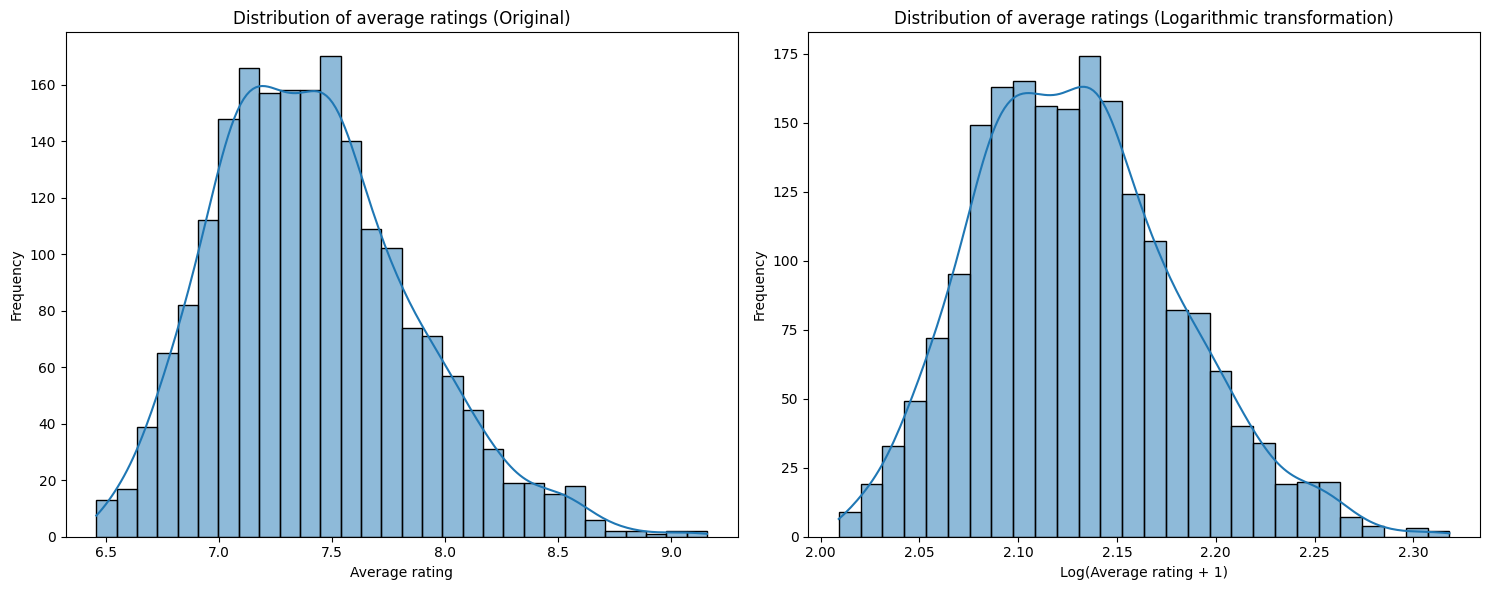

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=df, x='avg_rating', kde=True, ax=axes[0])
axes[0].set_title('Distribution of average ratings (Original)')
axes[0].set_xlabel('Average rating')
axes[0].set_ylabel('Frequency')

df['avg_rating_log'] = np.log1p(df['avg_rating'])

sns.histplot(data=df, x='avg_rating_log', kde=True, ax=axes[1])
axes[1].set_title('Distribution of average ratings (Logarithmic transformation)')
axes[1].set_xlabel('Log(Average rating + 1)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<Axes: xlabel='min_players', ylabel='max_players'>

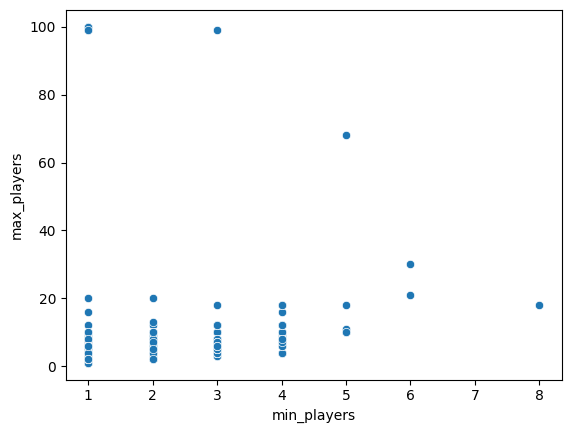

In [10]:
sns.scatterplot(x='min_players', y='max_players', data=df)

In [ ]:
# De acordo com o scatter plot o numero de jogadores maximo na maioria dos jogos
# é cerca de 20 jogadores.
# no gráfico é possível notar a presença de outliers no max_players 1; 3 e 4,
# onde os valores não seguem os mesmos padrões de máximo.

# According with scatter plot, the maximum number of players in majory of cases
# is around 0 and 20.
# The presence of outliers is apparent in max_players 1; 3 and 4, where values
# don't follow the same maximum pattern as others.

,row_id,release_year,min_players,max_players,min_playtime,max_playtime,minimum_age,avg_rating,num_ratings,complexity,...,rating_10,rank_strategy,rank_thematic,rank_family,rank_war,rank_customizable,rank_abstract,rank_party,rank_childrens,avg_rating_log
row_id,1.000000,-0.014429,0.043090,0.005884,-0.037907,-0.060282,-0.179940,-0.477495,-0.509106,-0.222102,...,-0.460853,0.988492,0.922113,0.981256,0.487299,0.684312,0.700616,0.806024,0.105674,-0.483929
release_year,-0.014429,1.000000,-0.068804,-0.181897,0.005583,0.003039,0.119558,0.060397,-0.030488,0.004491,...,-0.040369,-0.114463,-0.217415,-0.031347,-0.212250,-0.350243,-0.151677,0.001109,-0.728521,0.061358
min_players,0.043090,-0.068804,1.000000,0.098884,0.021599,-0.104290,-0.141552,-0.254746,0.076977,-0.231912,...,-0.023880,0.107842,0.036688,0.080221,-0.028014,0.292877,0.043612,-0.129254,0.447985,-0.255969
max_players,0.005884,-0.181897,0.098884,1.000000,-0.039336,-0.038726,-0.097742,-0.044696,0.035725,-0.116246,...,-0.001250,-0.033299,0.059027,-0.031941,0.354014,0.039143,0.094849,-0.063774,0.125573,-0.044318
min_playtime,-0.037907,0.005583,0.021599,-0.039336,1.000000,0.639272,0.304648,0.250626,-0.077726,0.549922,...,0.048048,-0.047404,-0.122350,-0.002043,-0.094009,0.004237,-0.006191,-0.076972,-0.345197,0.251727
max_playtime,-0.060282,0.003039,-0.104290,-0.038726,0.639272,1.000000,0.300045,0.355344,-0.066913,0.554218,...,0.086099,-0.160943,-0.110834,-0.078732,-0.165648,-0.210324,-0.215427,-0.171707,-0.364475,0.354210
minimum_age,-0.179940,0.119558,-0.141552,-0.097742,0.304648,0.300045,1.000000,0.347640,-0.060414,0.545801,...,0.108317,-0.124390,-0.145207,-0.067833,-0.024855,0.039943,-0.276334,-0.190470,-0.614978,0.350895
avg_rating,-0.477495,0.060397,-0.254746,-0.044696,0.250626,0.355344,0.347640,1.000000,0.070936,0.543209,...,0.348117,-0.631858,-0.685576,-0.657309,-0.754401,-0.839101,-0.836575,-0.840965,-0.933813,0.999378
num_ratings,-0.509106,-0.030488,0.076977,0.035725,-0.077726,-0.066913,-0.060414,0.070936,1.000000,-0.056654,...,0.754987,-0.496190,-0.437646,-0.433418,-0.049106,-0.309517,-0.242075,-0.146467,0.742125,0.070611
complexity,-0.222102,0.004491,-0.231912,-0.116246,0.549922,0.554218,0.545801,0.543209,-0.056654,1.000000,...,0.191397,-0.282565,-0.355865,-0.186556,-0.384186,-0.235836,-0.240210,-0.031074,-0.645486,0.544171


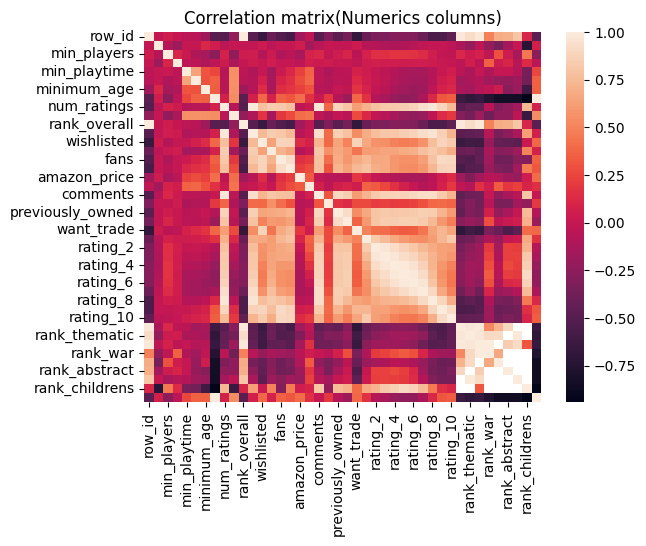

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df_numeric = df.select_dtypes(include=[float, int])

correlation_matrix = df_numeric.corr()

display(correlation_matrix)

sns.heatmap(correlation_matrix)
plt.title('Correlation matrix(Numerics columns)')
plt.show()

In [ ]:
# Maior valor 'rank_overall' e 'row_id'.
# Próximo de 0 'release_year' e 'rank_party'.

# Biggest value 'rank_overall' and 'row_id'.
# Next to 0 release_year' and 'rank_party'.

In [23]:
#Data de publicação = 'release_year'.

df['Decade'] = (df['release_year'] // 10) * 10

count_by_decade = df.groupby('Decade').size().reset_index(name='games_qantity')

display(count_by_decade)

,Decade,games_qantity
0,0,3
1,1470,1
2,1580,1
3,1630,1
4,1800,1
5,1810,1
6,1850,1
7,1870,1
8,1920,1
9,1950,1


In [ ]:
# A decada com maior numero de lançamentos foi 2010 com 1031 lançamentos.
# The decade with mostly releases was 2010 with 1031 releases.